In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/classification_SVM_Ex1.csv')
df

cid   R   F           M customer_value
0          1069  19   4   486.00000              M
1          1113  54   4   557.50000              M
2          1250  19   2   791.50000              M
3          1359  87   1   364.00000              L
4          1823  36   3   869.00000              M
...         ...  ..  ..         ...            ...
32261   2179544   1   1  3753.00000              M
32262   2179568   1   1   406.00000              L
32263   2179605   1   1  6001.00000              M
32264   2179643   1   1   887.00000              L
32265  20002000  24  27  1814.62963              H

[32266 rows x 5 columns]

In [3]:
CustomerData = df[['R', 'F', 'M']]
CustomerData.head()  #head()功能是顯示前五筆資料

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [4]:
CustomerTarget = df['customer_value']
CustomerTarget[:5]

0    M
1    M
2    M
3    L
4    M
Name: customer_value, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData,
    CustomerTarget,
    train_size = 0.75,
    stratify = CustomerTarget,
    random_state = 42
)

print("X_train: {:.0f}".format(len(X_train)))
print("X_test: {:.0f}".format(len(X_test)))
print("y_train: {:.0f}".format(len(y_train)))
print("y_test: {:.0f}".format(len(y_test)))

X_train: 24199
X_test: 8067
y_train: 24199
y_test: 8067


In [7]:
from sklearn.svm import SVC

In [8]:
mySVM = SVC(kernel = 'linear')
mySVM

SVC(kernel='linear')

In [9]:
mySVM.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_SVM_pred = mySVM.predict(X_test)
y_SVM_pred

array(['M', 'H', 'L', ..., 'L', 'L', 'H'], dtype=object)

In [11]:
from sklearn import metrics

In [12]:
#這一段可以不執行，因為想知道訓練階段的預測正確率是多少，通常會比測試階段的預測正確率高
"""
acc_SVM = metrics.accuracy_score(y_train, mySVM.predict(X_train))
print("Accuracy: {:.2f}".format(acc_SVM))
"""

Accuracy: 0.89


In [13]:
acc_SVM = metrics.accuracy_score(y_test, y_SVM_pred)
print("Accuracy: {:.2f}".format(acc_SVM))

Accuracy: 0.88


In [14]:
mycm_SVM = metrics.confusion_matrix(y_test, y_SVM_pred)
print('Confusion Matrix: \n', mycm_SVM)

Confusion Matrix: 
 [[2516    0  207]
 [   3 2252  247]
 [ 334  141 2367]]


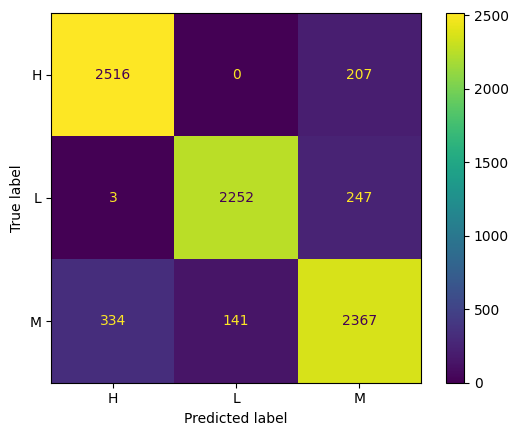

In [15]:
metrics.ConfusionMatrixDisplay(confusion_matrix = mycm_SVM, display_labels = mySVM.classes_).plot()

In [16]:
newdata = [[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
print(newdata)
y_newpred_SVM_c = mySVM.predict(newdata)
print(y_newpred_SVM_c)

[[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
['H' 'H']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
newdata = [[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
print(newdata)
y_newpred_SVM_c = mySVM.predict(newdata)
print(y_newpred_SVM_c)

[[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
['H' 'H']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
